In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

import warnings
warnings.filterwarnings("ignore")

from zwad.utils import latex_feature_names

# Pretty $\LaTeX$ feature names, colors and field labels

In [2]:
latex_names = latex_feature_names('../data/latex_feature_names.csv')
colors = {
    'm31': '#1b9e77',
    'deep': '#fc8d62',
    'disk': '#8da0cb',
}
field_names = {
    'm31': r'\textsc{M\,31}',
    'deep': r'\textsc{Deep}',
    'disk': r'\textsc{Disk}',
}

## Run `make_anomalies_tables.ipynb` first to create `../data/*_expert_anomalies.csv`

In [3]:
# M31
m31_oid = np.memmap('../data/oid_m31.dat', mode='r', dtype=np.uint64)
m31_names = open('../data/feature_m31.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
m31_dtype = [(name, np.float32) for name in m31_names]
m31_x = np.memmap('../data/feature_m31.dat', mode='r', dtype=m31_dtype, shape=m31_oid.shape)


# Disk
disk_oid = np.memmap('../data/oid_disk.dat', mode='r', dtype=np.uint64)
disk_names = open('../data/feature_disk.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
disk_dtype = [(name, np.float32) for name in disk_names]
disk_x = np.memmap('../data/feature_disk.dat', mode='r', dtype=disk_dtype, shape=disk_oid.shape)


# Deep
deep_oid = np.memmap('../data/oid_deep.dat', mode='r', dtype=np.uint64)
deep_names = open('../data/feature_deep.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
deep_dtype = [(name, np.float32) for name in deep_names]
deep_x = np.memmap('../data/feature_deep.dat', mode='r', dtype=deep_dtype, shape=deep_oid.shape)

In [4]:
# #updated from ANOMALIES_PAD 11/23/2020

m31_anom_tab = pd.read_csv('../data/m31_expert_anomalies.csv', index_col='oid')
disk_anom_tab = pd.read_csv('../data/disk_expert_anomalies.csv', index_col='oid')
deep_anom_tab = pd.read_csv('../data/deep_expert_anomalies.csv', index_col='oid')

In [5]:
m31_anom_tab

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
oid,,,,,,,,,,,,,,,,,,,,,
695211200058391,1.080000,0.330097,0.038835,0.395421,0.336107,96941336.0,0.565500,1.034199,0.377343,-0.017752,...,0.134401,0.022435,0.874175,1.656223,34.118484,3.478692,0.811280,0.415326,0.798510,20.626154
695211200035023,0.919500,0.187500,0.086538,0.372327,0.135560,220374260.0,0.467499,1.099400,1.052788,-0.002589,...,0.111273,0.020920,0.829133,1.990572,78.201820,8.496761,1.292874,0.393981,0.870150,19.604841
695211400009049,0.763500,0.428571,0.000000,0.438763,0.194513,72289330.0,0.808002,1.165999,-1.336752,0.011980,...,0.093476,0.017952,1.078872,3.831684,49.701527,5.552580,-0.282411,0.444718,0.910447,20.274681
695211400046832,0.979000,0.145631,0.029126,0.224395,0.786437,295042620.0,0.212999,0.440001,18.727877,0.002106,...,0.082955,0.139150,0.902825,0.786272,9.366056,0.839313,3.378764,0.245349,0.721399,20.518684
695211200077906,0.337501,0.120253,0.094937,0.208027,1.148685,528294300.0,0.029001,0.371799,3.835977,-0.001096,...,0.173981,0.040965,1.204176,1.206255,13.130699,134.917700,-2.285050,0.161306,0.706491,16.837383
695211400025927,0.701500,0.297030,0.039604,0.333839,0.780629,337253700.0,0.323002,0.626799,0.552218,0.014561,...,0.140121,0.027622,0.623367,1.225854,27.272932,1.195005,0.324640,0.242561,0.791279,20.601425
695211200057718,0.928000,0.326389,0.027778,0.416115,0.243381,404207460.0,0.675501,1.319599,-0.692586,-0.001005,...,0.094246,0.017760,1.049509,3.760212,55.255604,6.077719,0.755290,0.480539,0.802381,20.208523
695211100015190,0.981999,0.138211,0.081301,0.353806,0.233171,137418660.0,0.464251,0.811600,2.162920,0.005433,...,0.169431,0.049908,0.822073,1.333406,35.070377,4.851675,1.575419,0.429781,0.804553,19.868694


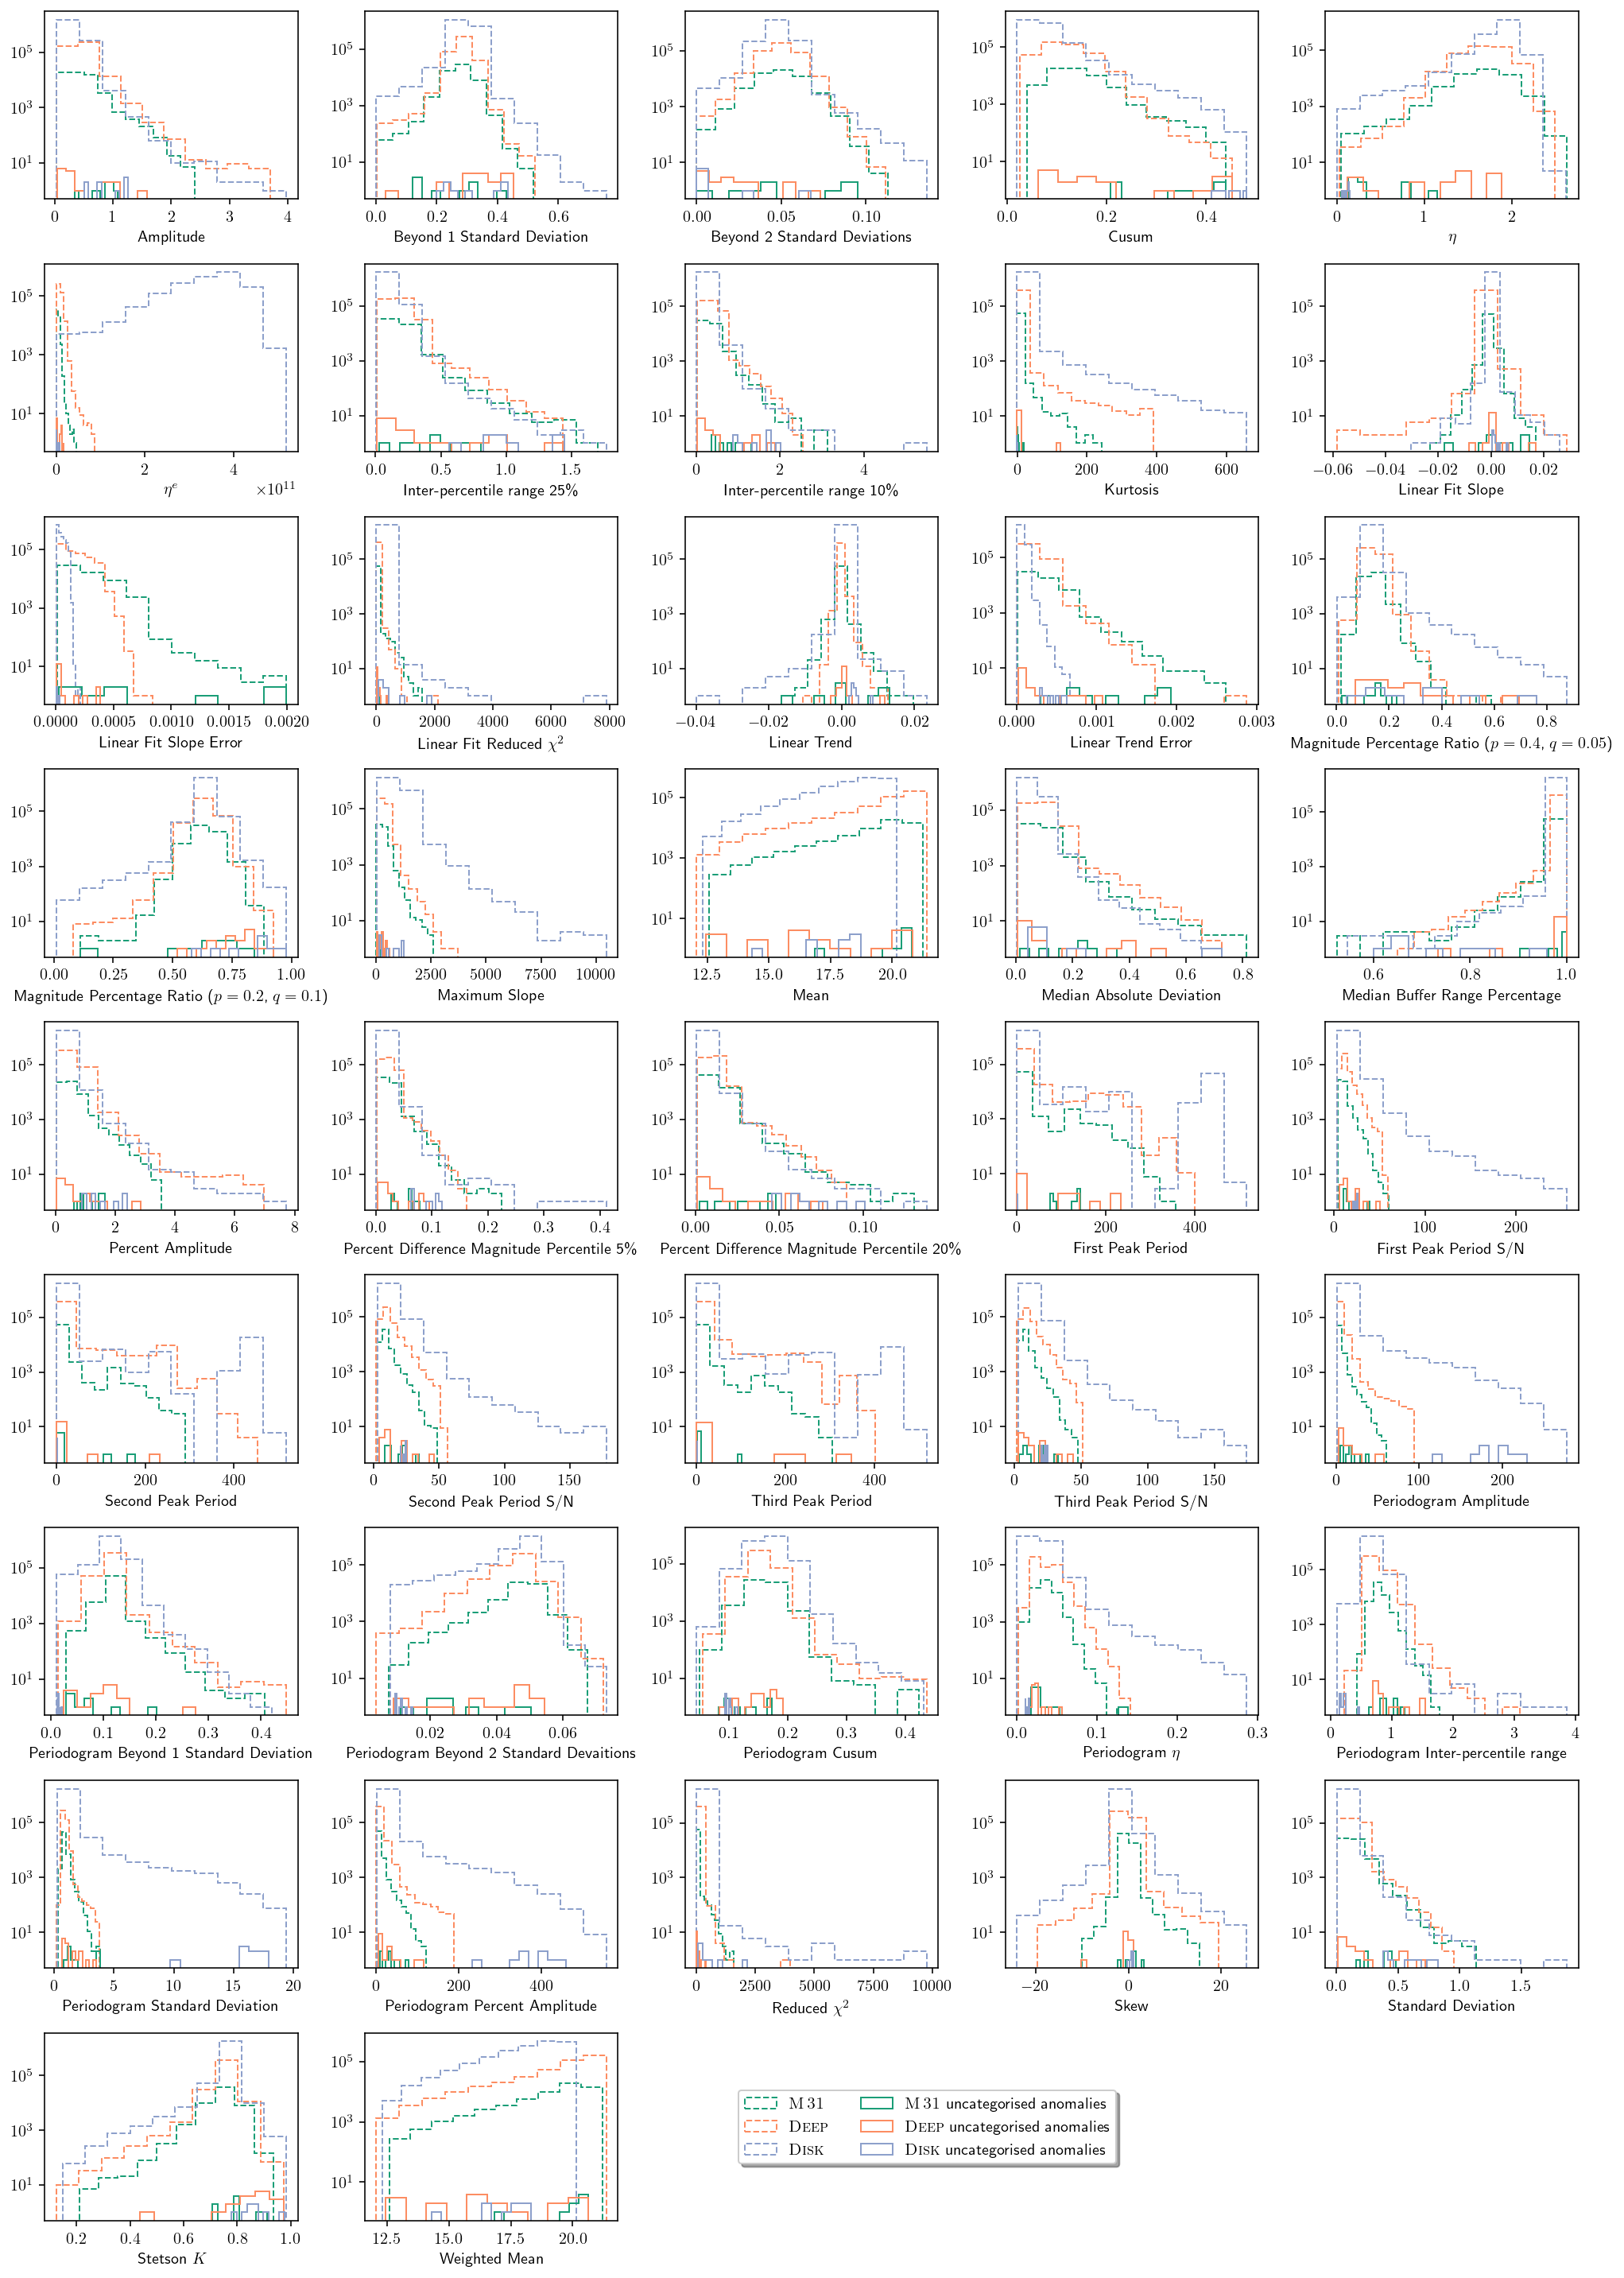

In [6]:
fig = plt.figure(figsize=(14, 20))
plt.rcParams.update({'text.usetex': True})

for i, f in enumerate(m31_names):
    ax = fig.add_subplot(9, 5, i+1) #42 features

    plt.hist(m31_x['{}'.format(f)], histtype='step', color=colors['m31'], 
             linestyle='dashed', linewidth=1, label=field_names['m31'])
    plt.hist(deep_x['{}'.format(f)], histtype='step', color=colors['deep'], 
             linestyle='dashed', linewidth=1, label=field_names['deep'])
    plt.hist(disk_x['{}'.format(f)], histtype='step', color=colors['disk'], 
             linestyle='dashed', linewidth=1, label=field_names['disk'])
    plt.hist(m31_anom_tab['{}'.format(f)], histtype='step', color=colors['m31'], 
             alpha=1, linewidth=1, label=field_names['m31'] + ' uncategorised anomalies')
    plt.hist(deep_anom_tab['{}'.format(f)], histtype='step', color=colors['deep'], 
             alpha=1, linewidth=1, label=field_names['deep'] + ' uncategorised anomalies')
    plt.hist(disk_anom_tab['{}'.format(f)], histtype='step', color=colors['disk'], 
             alpha=1, linewidth=1, label=field_names['disk'] + ' uncategorised anomalies')
    
    ax.set_xlabel(latex_names[f])
    ax.set_yscale('log')

plt.tight_layout()
plt.legend(loc='center right', bbox_to_anchor=(3.0, 0.5), ncol=2, fancybox=True, shadow=True)

fig.savefig('../figs/histograms/all_features_histogram_uncat_anomalies.png', format='png', dpi=300)

# PLOT 3 MOST IMPORTANT FEATURES (MOST IMPORTANT FROM 1st THREE PRINCIPAL COMPONENT)

In [7]:
three_most_important_features = ['standard_deviation', 'periodogram_amplitude', 'chi2']

<Figure size 432x288 with 0 Axes>

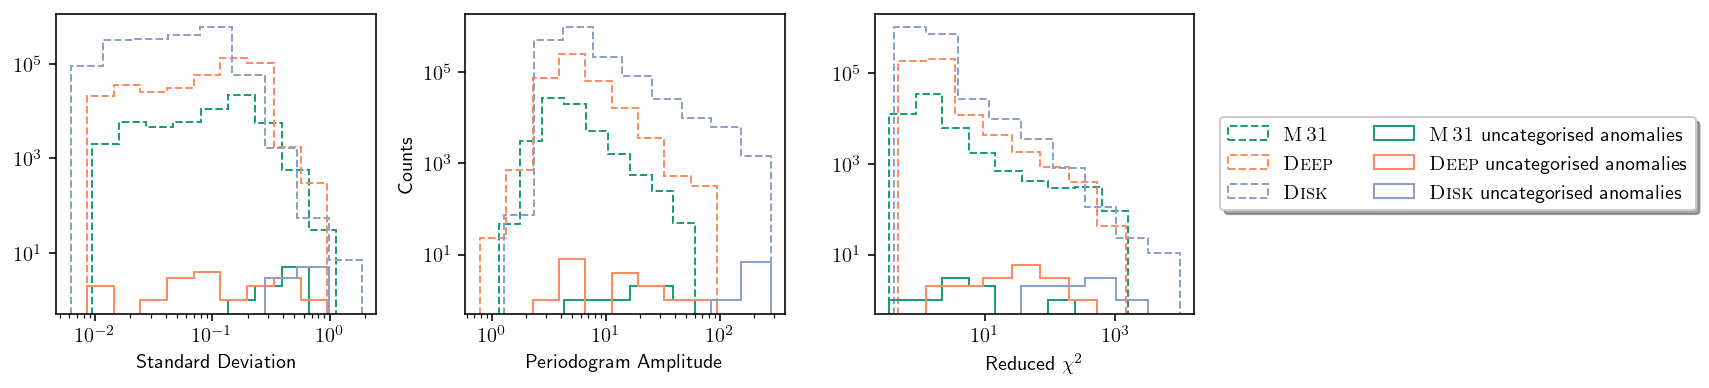

In [8]:
plt.clf()
# fig, axes = plt.subplots(1, 3, gridspec_kw = {'wspace':0, 'hspace':0}, sharey=True, figsize=(20, 5))
fig, axes = plt.subplots(1, 3, figsize=(12, 2.8))

for ax, f in zip(axes, three_most_important_features):
    m31_bins = np.logspace(np.log10(m31_x[f].min()), np.log10(m31_x[f].max()), 10)
    deep_bins = np.logspace(np.log10(deep_x[f].min()), np.log10(deep_x[f].max()), 10)
    disk_bins = np.logspace(np.log10(disk_x[f].min()), np.log10(disk_x[f].max()), 10)
    ax.hist(m31_x[f], bins=m31_bins, histtype='step', color=colors['m31'], 
             linestyle='dashed', linewidth=1, label=field_names['m31'])
    ax.hist(deep_x[f], bins=deep_bins, histtype='step', color=colors['deep'], 
             linestyle='dashed', linewidth=1, label=field_names['deep'])
    ax.hist(disk_x[f], bins=disk_bins, histtype='step', color=colors['disk'], 
             linestyle='dashed', linewidth=1, label=field_names['disk'])
    ax.hist(m31_anom_tab[f], bins=m31_bins, histtype='step', color=colors['m31'], 
             alpha=1, linewidth=1, label=field_names['m31'] + ' uncategorised anomalies')
    ax.hist(deep_anom_tab[f], bins=deep_bins, histtype='step', color=colors['deep'], 
             alpha=1, linewidth=1, label=field_names['deep'] + ' uncategorised anomalies')
    ax.hist(disk_anom_tab[f], bins=disk_bins, histtype='step', color=colors['disk'], 
             alpha=1, linewidth=1, label=field_names['disk'] + ' uncategorised anomalies')

    ax.set_xlabel(latex_names[f])
    ax.set_yscale('log')
    ax.set_xscale('log')

axes[1].set_ylabel('Counts')

    
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2, fancybox=True, shadow=True)
fig.tight_layout()

fig.savefig('../figs/histograms/three_most_important_features_uncat_anomalies.png', format='png', bbox_inches='tight', dpi=300)

# Plot artefacts and interesting objects of outliers lists only

In [9]:
m31_maria_list = pd.read_csv('../data/m31_maria.csv')
m31_maria_list= m31_maria_list.set_index('oid')

disk_maria_list = pd.read_csv('../data/disk_maria.csv')
disk_maria_list= disk_maria_list.set_index('oid')

deep_maria_list = pd.read_csv('../data/deep_maria.csv', encoding='latin-1')
deep_maria_list= deep_maria_list.set_index('oid')

## Below are outliers tables (incl. artefacts), not expert anomalies (no incl. artefacts)!

m31_outlier_tab = pd.read_csv('../data/m31_outliers_table.csv', index_col='oid')
disk_outlier_tab = pd.read_csv('../data/disk_outliers_table.csv', index_col='oid')
deep_outlier_tab = pd.read_csv('../data/deep_outliers_table.csv', index_col='oid')

In [10]:
m31_full_tab = pd.concat([m31_outlier_tab, m31_maria_list], axis=1)
disk_full_tab = pd.concat([disk_outlier_tab, disk_maria_list], axis=1)
deep_full_tab = pd.concat([deep_outlier_tab, deep_maria_list], axis=1)

m31_full_tab.head()

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,chi2,skew,standard_deviation,stetson_K,weighted_mean,-1,tag,tag_detailed,Comments,Unnamed: 5
oid,,,,,,,,,,,,,,,,,,,,,
695211400034403,2.3800,0.293706,0.048951,0.210137,1.039928,1.205708e+09,1.702999,2.813601,-0.436671,-0.000443,...,1568.27230,0.410859,1.097088,0.875042,16.457632,0,artefact,bright star,NaN,NaN
695211400124577,2.0445,0.358025,0.006173,0.203197,1.588497,2.624290e+09,1.459000,3.120001,-0.784893,-0.003234,...,1209.48120,0.397880,1.082259,0.903058,16.626255,1,artefact,bright star,NaN,NaN
695211400102351,2.3620,0.396694,0.024793,0.155299,1.549895,2.136628e+09,1.404751,3.065599,-0.579718,0.001458,...,747.95715,0.321721,1.132575,0.900564,17.092886,2,artefact,bright star,NaN,NaN
695211400053697,2.2125,0.310000,0.080000,0.229030,1.349776,4.898475e+08,1.032000,2.337502,0.153038,0.000263,...,1371.10170,0.280188,0.917519,0.851317,16.688284,3,artefact,bright star,NaN,NaN
695211400000352,2.4000,0.288288,0.045045,0.160094,1.602353,9.396195e+08,1.299751,2.475200,0.269096,-0.001185,...,1488.70950,0.583173,0.983108,0.864887,16.493820,4,artefact,bright star,NaN,NaN


In [11]:
m31_artefacts = m31_full_tab[m31_full_tab.tag == 'artefact']
m31_interesting = m31_full_tab[m31_full_tab.tag != 'artefact']

disk_artefacts = disk_full_tab[disk_full_tab.tag == 'artefact']
disk_interesting = disk_full_tab[disk_full_tab.tag != 'artefact']

deep_artefacts = deep_full_tab[deep_full_tab.tag == 'artefact']
deep_interesting = deep_full_tab[deep_full_tab.tag != 'artefact']

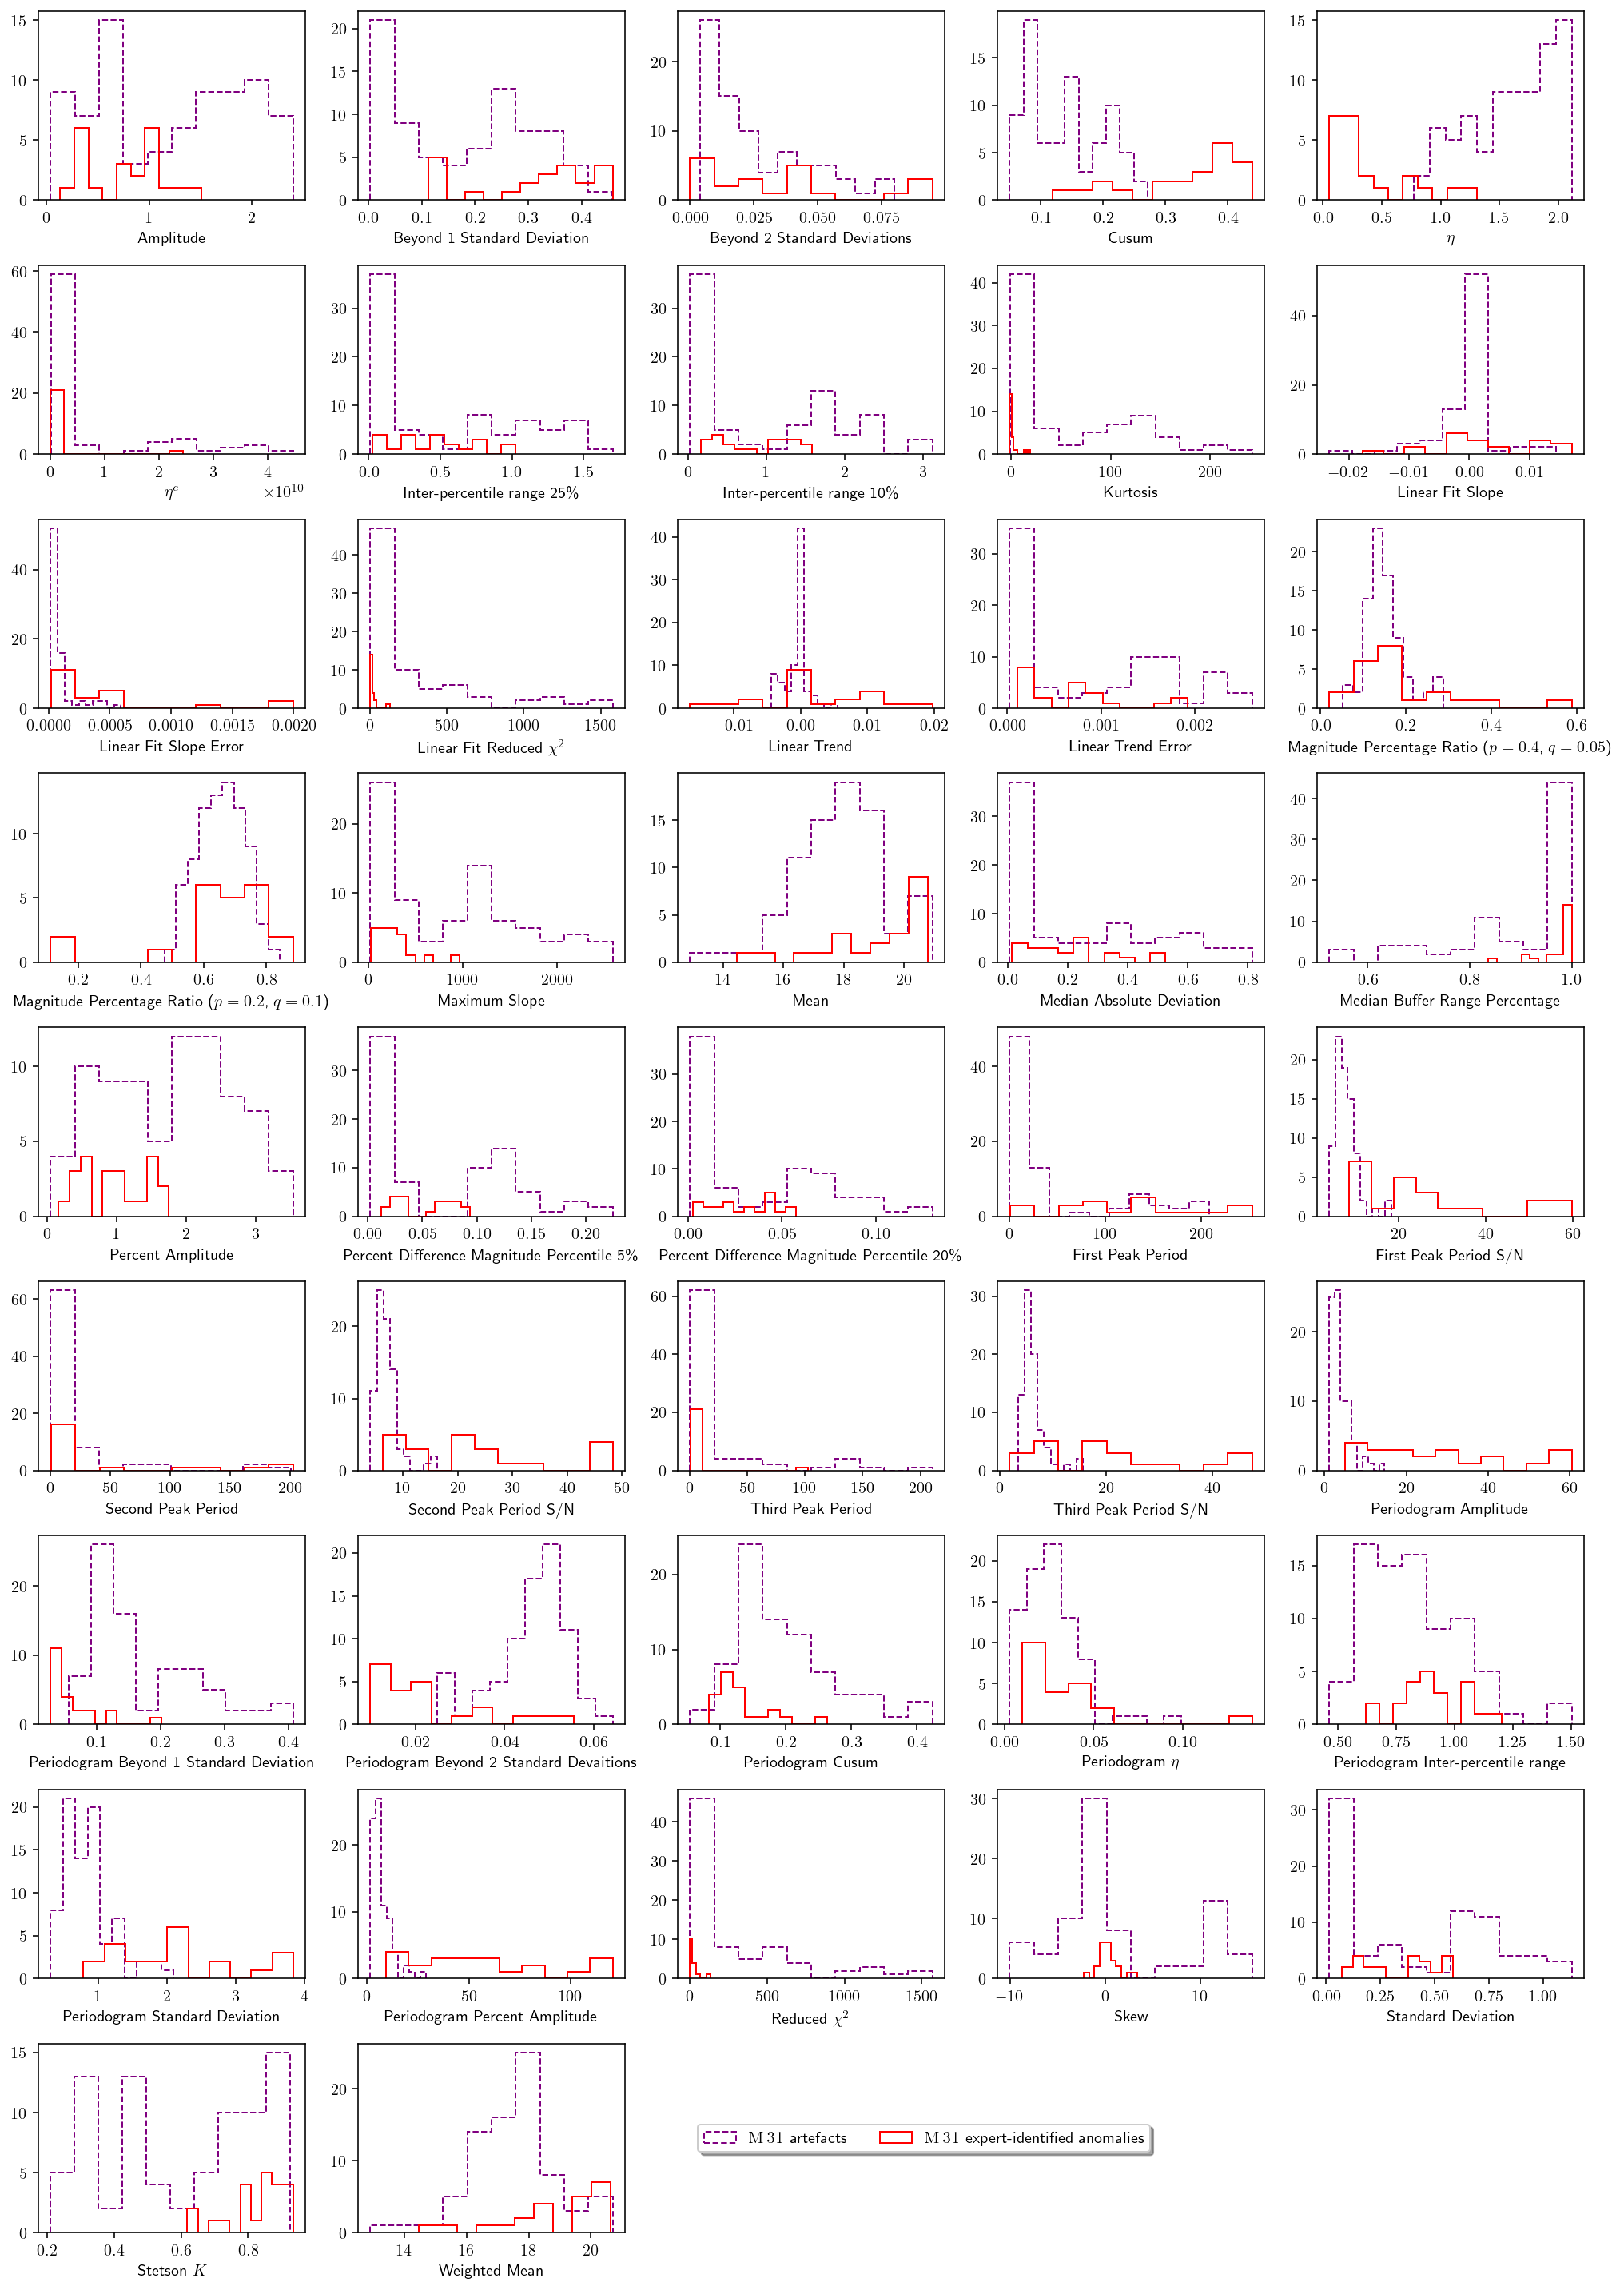

In [12]:
fig = plt.figure(figsize=(14, 20))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
# plt.rcParams.update({'font.size': 26})


for i, f in enumerate(m31_names):
    ax = fig.add_subplot(9, 5, i+1) #42 features

    plt.hist(m31_artefacts[f], histtype='step', color='purple', linewidth=1,
             ls='--', label=field_names['m31'] + ' artefacts')
    plt.hist(m31_interesting[f], histtype='step', color='red', 
             alpha=1, linewidth=1, label=field_names['m31'] + ' expert-identified anomalies')
    
    #ax.set_title(r'{}'.format(f), fontsize=14)
    #ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel(latex_names[f])
    #ax.set_yscale('log')
    #ax.tick_params(labelsize=20)
    #ax.legend(loc='best')

fig.tight_layout()
plt.legend(loc='center right', bbox_to_anchor=(3.0, 0.5), ncol=2, fancybox=True, shadow=True)


fig.savefig('../figs/histograms/m31_artefacts_vs_interesting_objs.png', format='png', bbox_inches='tight', dpi=300)

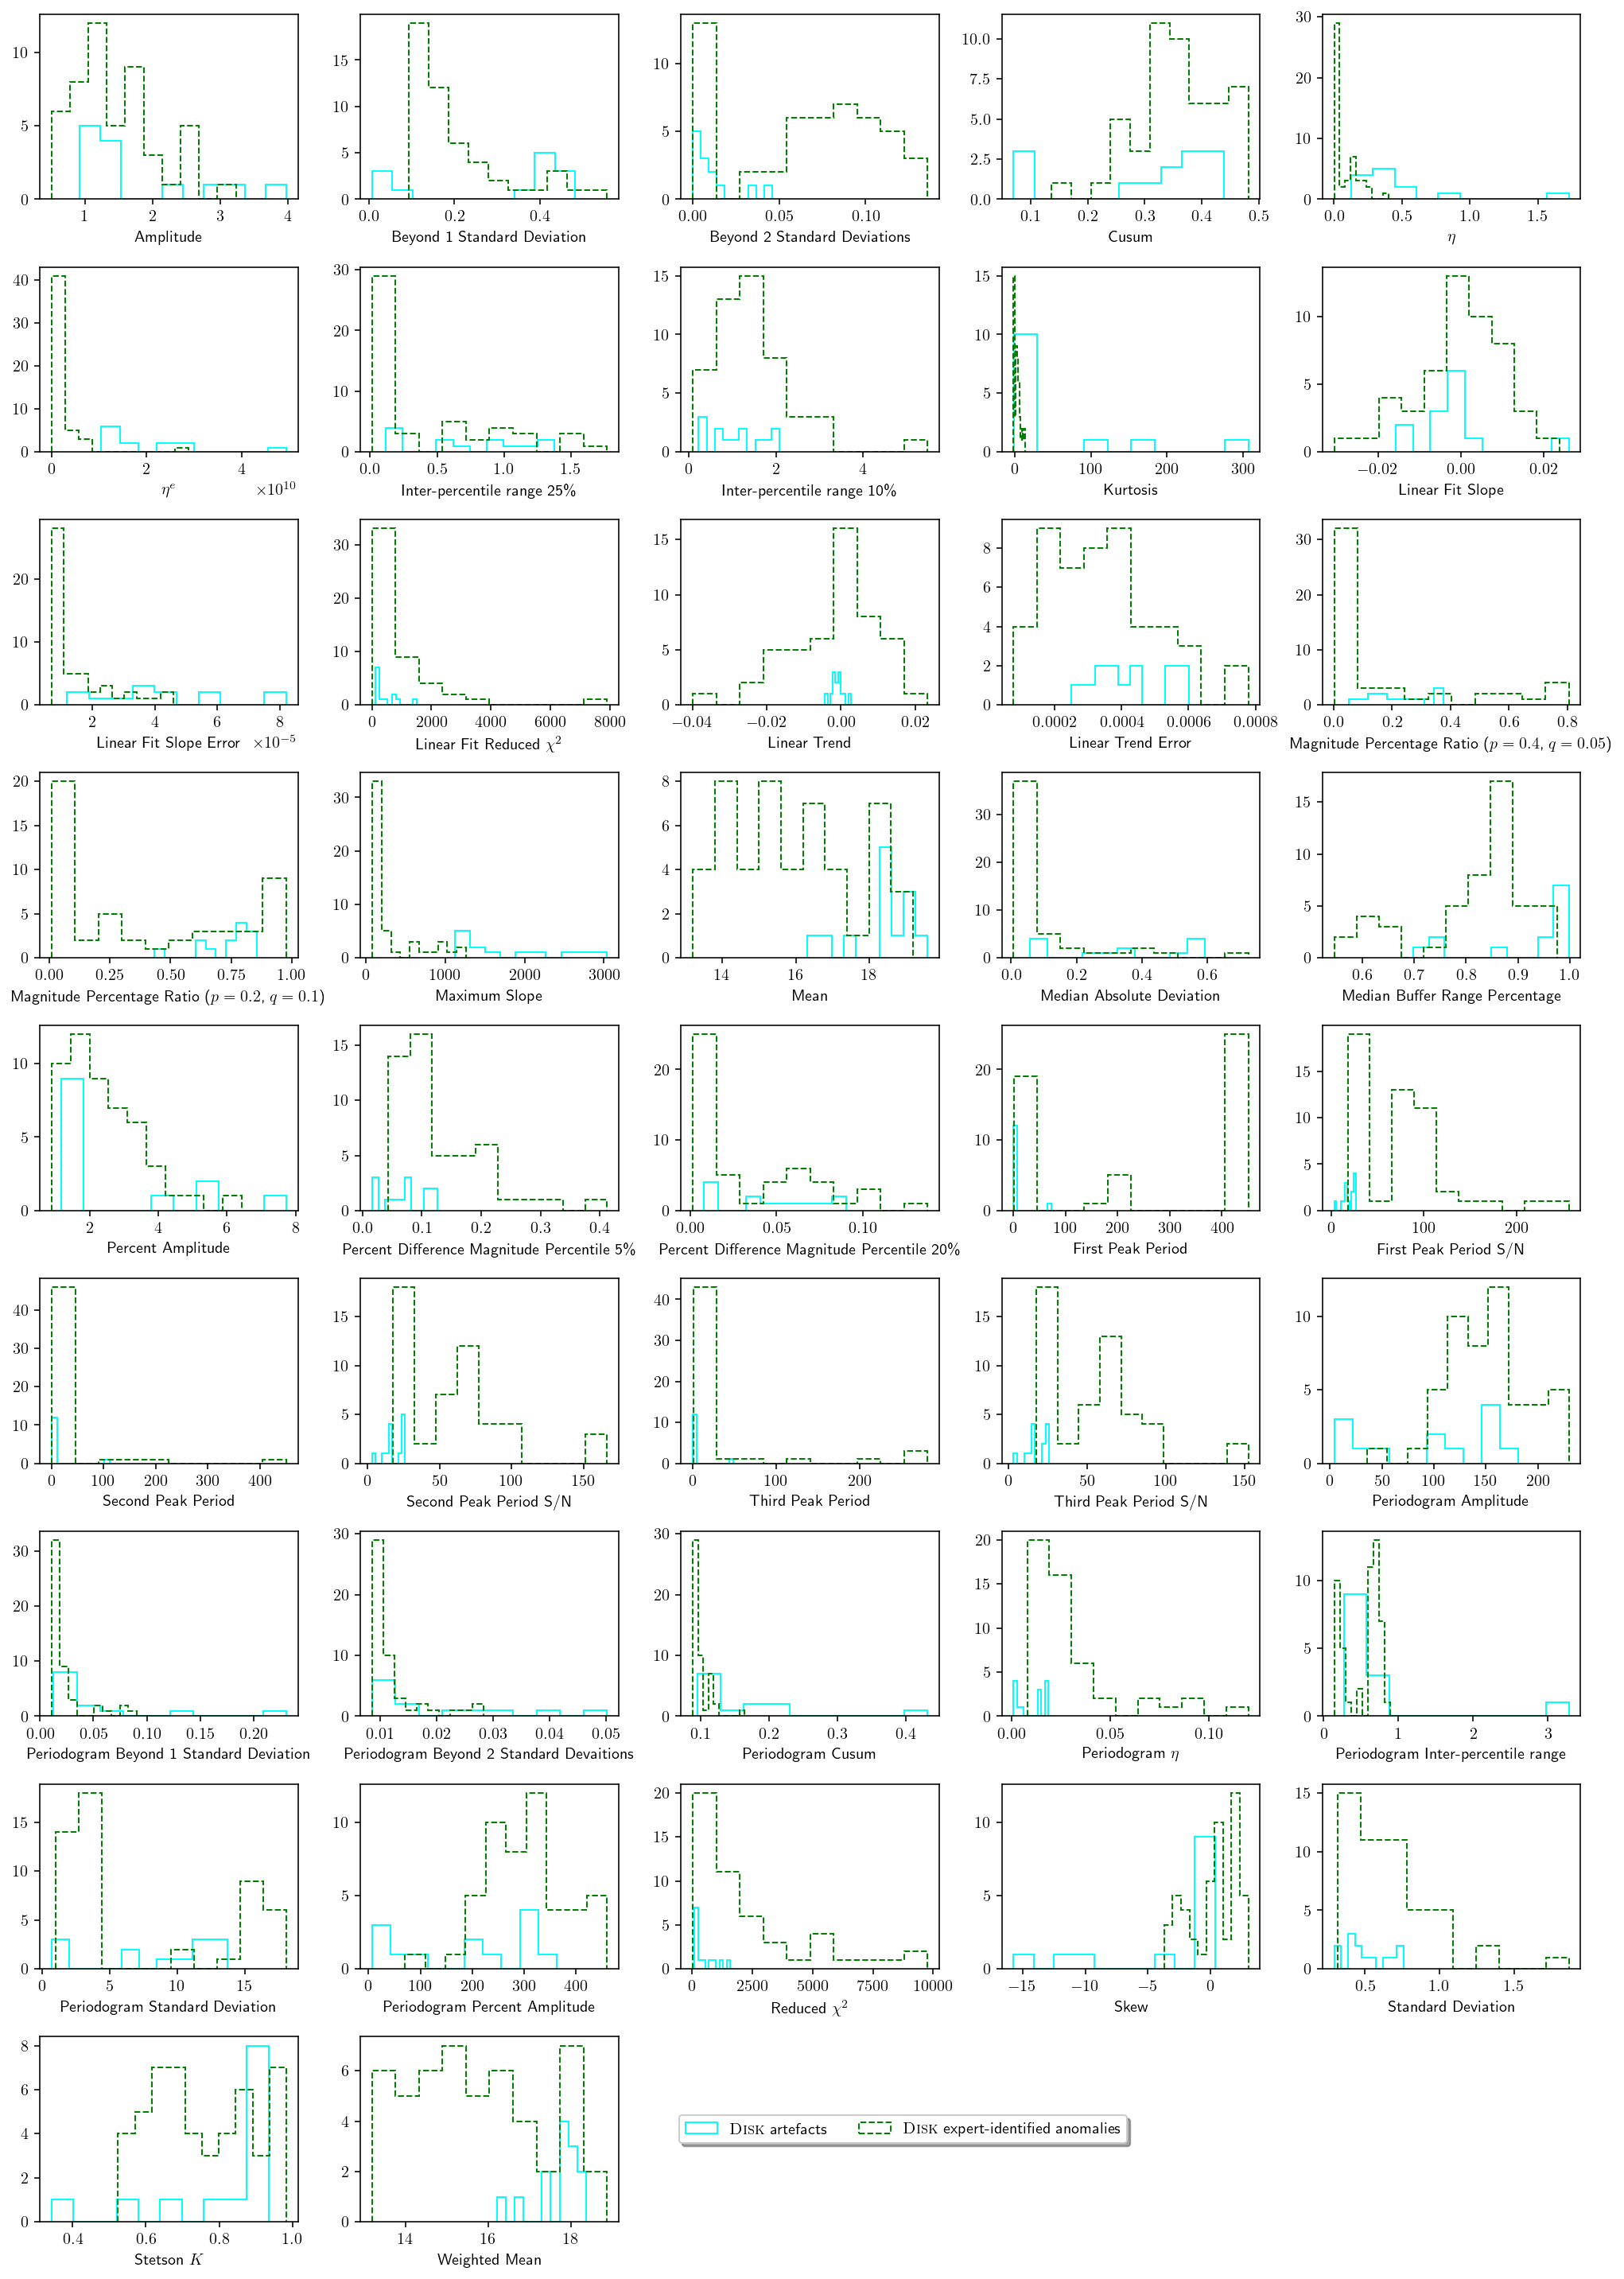

In [13]:
fig = plt.figure(figsize=(14, 20))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
# plt.rcParams.update({'font.size': 26})


for i, f in enumerate(map(latex_names.get, m31_names)):
    ax = fig.add_subplot(9, 5, i+1) #42 features

    plt.hist(disk_artefacts[f], histtype='step', color='cyan',
             linewidth=1, label=field_names['disk'] + ' artefacts')
    plt.hist(disk_interesting[f], histtype='step', ls='--', color='green', 
             alpha=1, linewidth=1, label=field_names['disk'] + ' expert-identified anomalies')
    
    #ax.set_title(r'{}'.format(f), fontsize=14)
    #ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel(f)
    #ax.set_yscale('log')
    #ax.tick_params(labelsize=20)
    #ax.legend(loc='best')

    
fig.tight_layout()
plt.legend(loc='center right', bbox_to_anchor=(3.0, 0.5), ncol=2, fancybox=True, shadow=True)


fig.savefig('../figs/histograms/disk_artefacts_vs_interesting_objs.png', format='png', bbox_inches='tight', dpi=300)

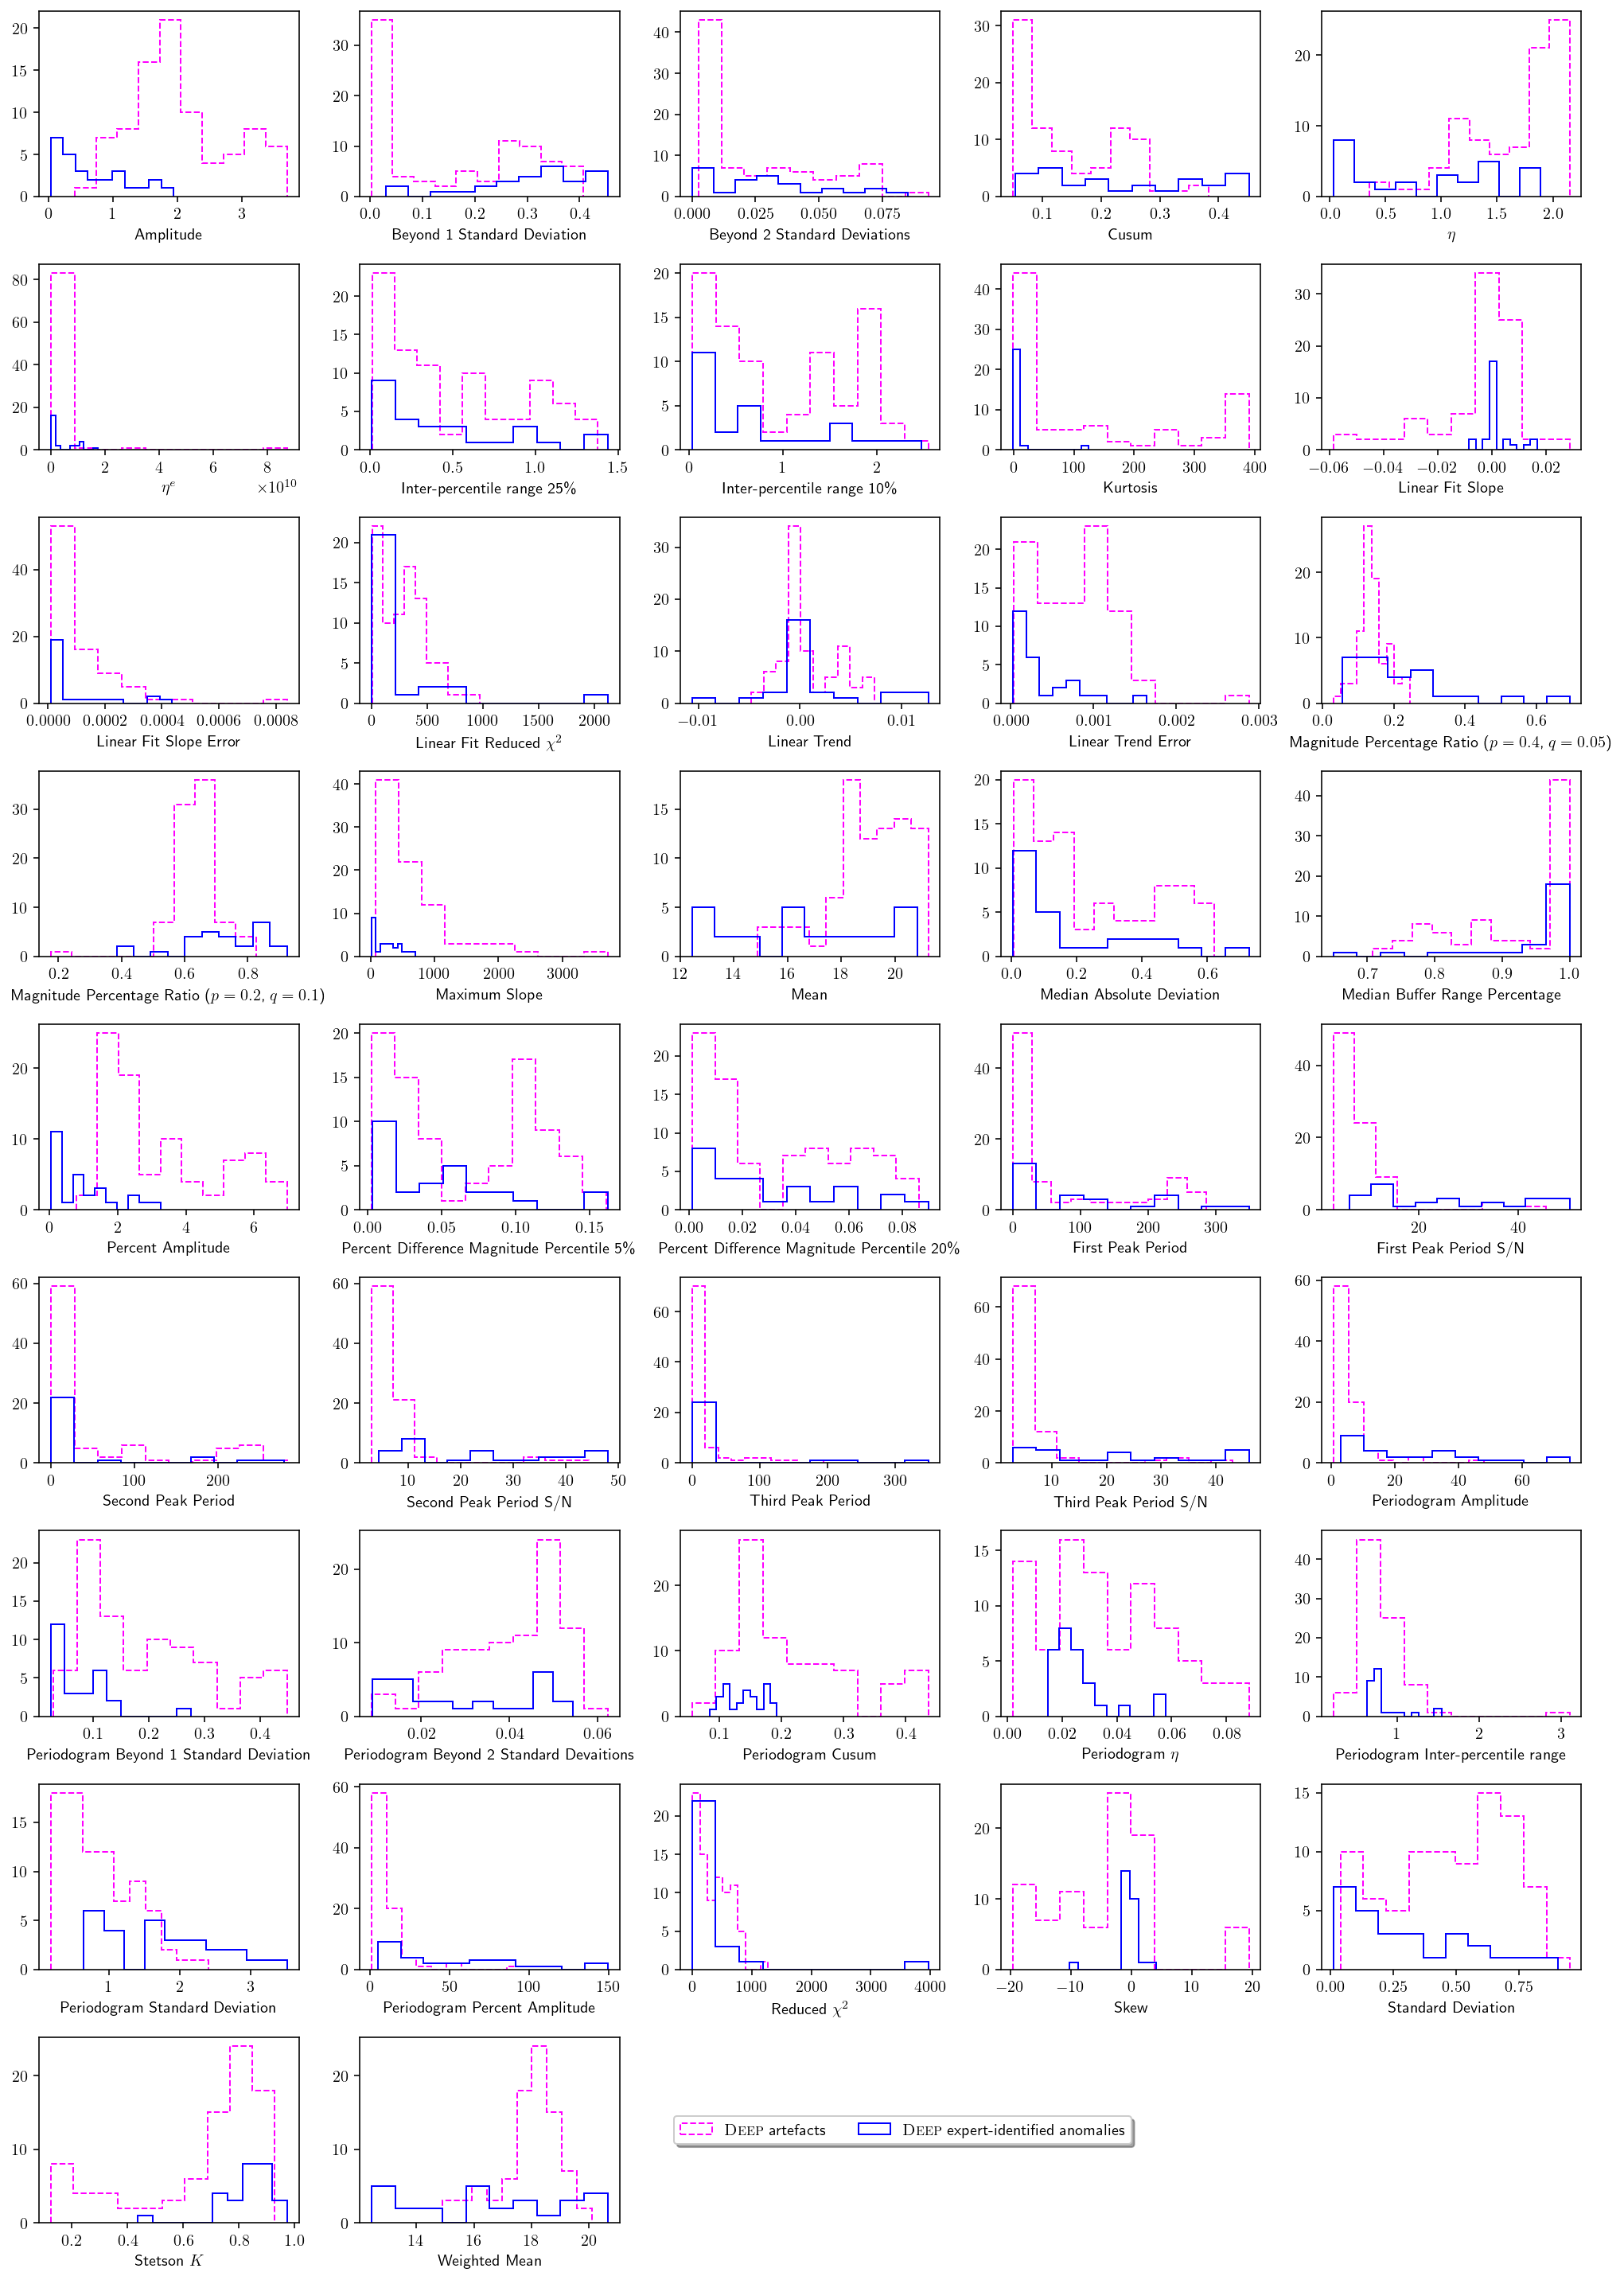

In [14]:
fig = plt.figure(figsize=(14, 20))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
# plt.rcParams.update({'font.size': 26})


for i, f in enumerate(map(latex_names.get, m31_names)):
    ax = fig.add_subplot(9, 5, i+1) #42 features

    plt.hist(deep_artefacts[f], ls='--', histtype='step', color='magenta', linewidth=1,
             label=field_names['deep'] + ' artefacts')
    plt.hist(deep_interesting[f], histtype='step', color='blue', 
             alpha=1, linewidth=1, label=field_names['deep'] + ' expert-identified anomalies')
    
    #ax.set_title(r'{}'.format(f), fontsize=14)
    #ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel(f)
    #ax.set_yscale('log')
    #ax.tick_params(labelsize=20)
    #ax.legend(loc='best')
        
fig.tight_layout()
plt.legend(loc='center right', bbox_to_anchor=(3.0, 0.5), ncol=2, fancybox=True, shadow=True)

        
fig.savefig('../figs/histograms/deep_artefacts_vs_interesting_objs.png', format='png', bbox_inches='tight', dpi=300)

# REPEAT FOR OUTLIERS HISTOGRAMS!!

In [15]:
# #updated from ANOMALIES_PAD 11/23/2020

m31_outliers_tab = pd.read_csv('../data/m31_outliers_table.csv', index_col='oid')
disk_outliers_tab = pd.read_csv('../data/disk_outliers_table.csv', index_col='oid')
deep_outliers_tab = pd.read_csv('../data/deep_outliers_table.csv', index_col='oid')

In [16]:
m31_outliers_tab

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
oid,,,,,,,,,,,,,,,,,,,,,
695211400034403,2.380000,0.293706,0.048951,0.210137,1.039928,1.205708e+09,1.702999,2.813601,-0.436671,-0.000443,...,0.118531,0.011458,0.861847,1.873147,28.882809,1568.272300,0.410859,1.097088,0.875042,16.457632
695211400124577,2.044500,0.358025,0.006173,0.203197,1.588497,2.624290e+09,1.459000,3.120001,-0.784893,-0.003234,...,0.112881,0.019039,0.824700,0.893768,9.279490,1209.481200,0.397880,1.082259,0.903058,16.626255
695211400102351,2.362000,0.396694,0.024793,0.155299,1.549895,2.136628e+09,1.404751,3.065599,-0.579718,0.001458,...,0.144106,0.022466,0.992880,0.968951,8.050076,747.957150,0.321721,1.132575,0.900564,17.092886
695211400053697,2.212500,0.310000,0.080000,0.229030,1.349776,4.898475e+08,1.032000,2.337502,0.153038,0.000263,...,0.182627,0.026980,1.074533,0.876942,4.537641,1371.101700,0.280188,0.917519,0.851317,16.688284
695211400000352,2.400000,0.288288,0.045045,0.160094,1.602353,9.396195e+08,1.299751,2.475200,0.269096,-0.001185,...,0.143338,0.017688,0.736078,1.019456,9.457602,1488.709500,0.583173,0.983108,0.864887,16.493820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695211100015190,0.981999,0.138211,0.081301,0.353806,0.233171,1.374187e+08,0.464251,0.811600,2.162920,0.005433,...,0.169431,0.049908,0.822073,1.333406,35.070377,4.851675,1.575419,0.429781,0.804553,19.868694
695211200075348,1.108000,0.458333,0.013889,0.400897,0.117357,2.367448e+07,1.024000,1.484999,-1.029066,0.017021,...,0.101488,0.048847,0.894277,2.820131,63.978363,12.322401,0.163349,0.557800,0.902715,20.001472
695211400121607,1.044000,0.361111,0.000000,0.435610,0.365767,7.381361e+08,0.948000,1.390501,-1.225617,0.010255,...,0.136348,0.009870,0.953997,3.646029,42.746563,8.932074,0.155026,0.562205,0.877161,20.012375


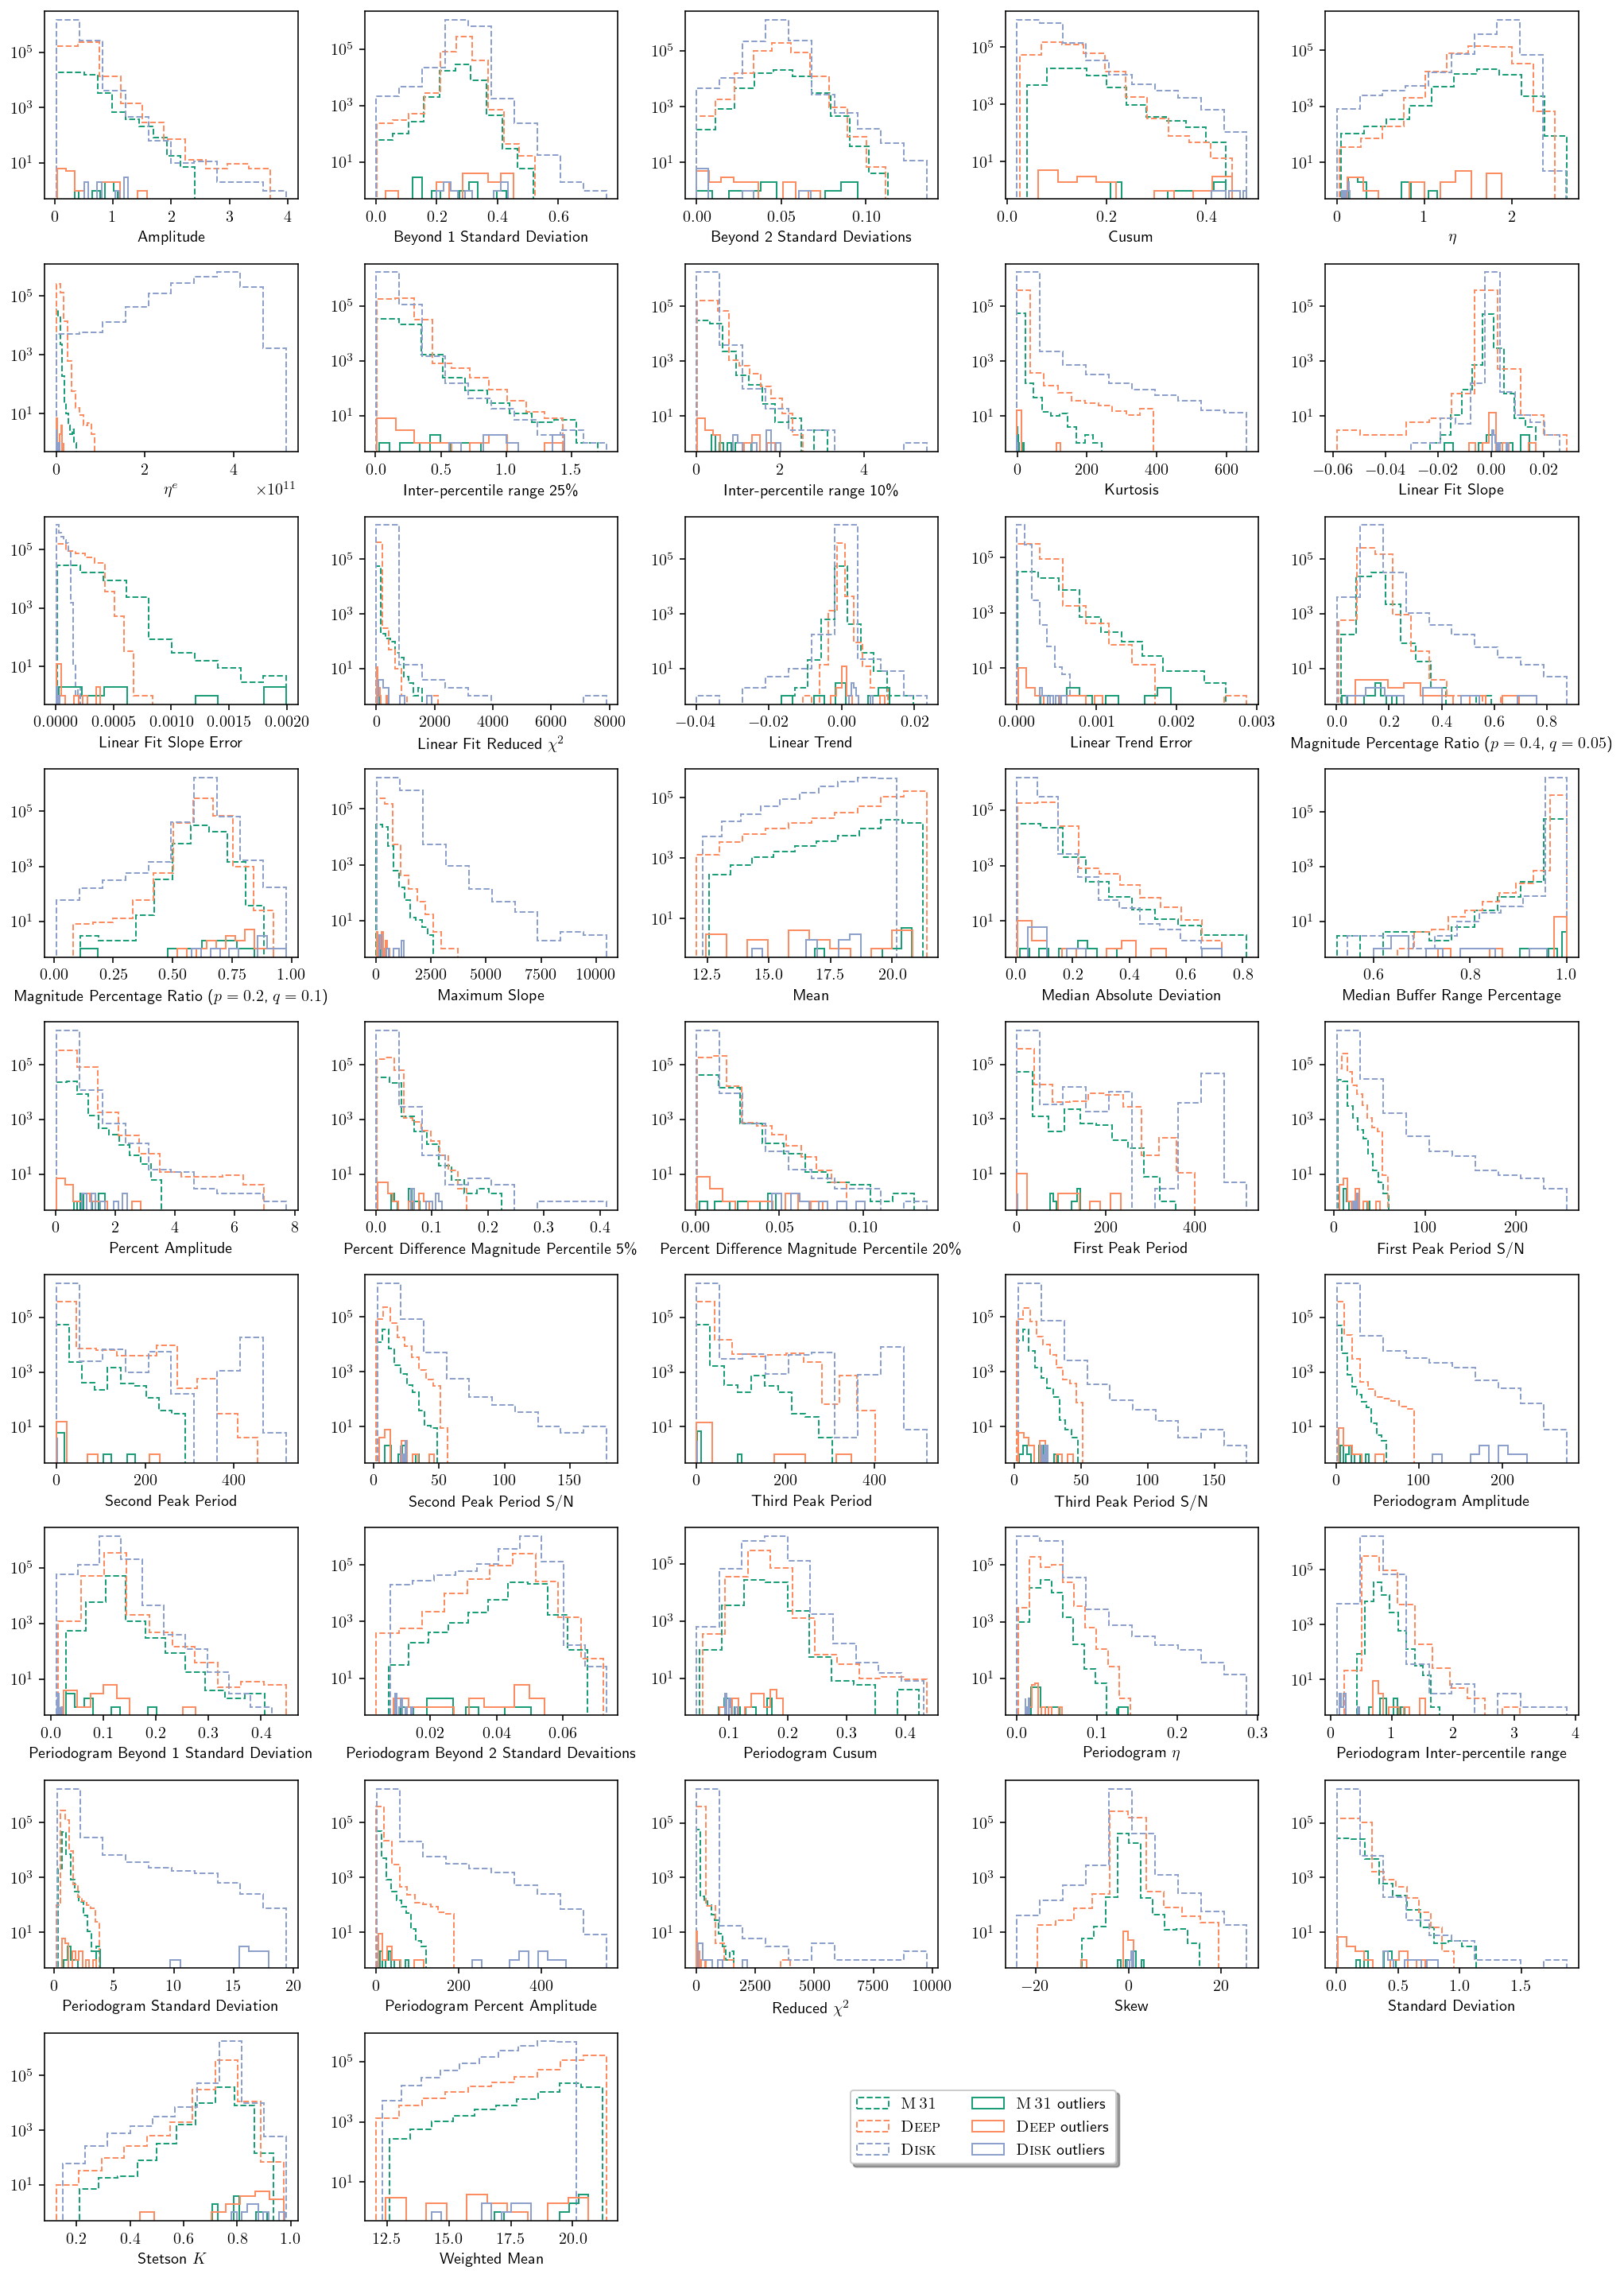

In [17]:
fig = plt.figure(figsize=(14, 20))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
# plt.rcParams.update({'font.size': 32})


for i, f in enumerate(m31_names):
    ax = fig.add_subplot(9, 5, i+1) #42 features

    plt.hist(m31_x['{}'.format(f)], histtype='step', color=colors['m31'], 
             linestyle='dashed', linewidth=1, label=field_names['m31'])
    plt.hist(deep_x['{}'.format(f)], histtype='step', color=colors['deep'], 
             linestyle='dashed', linewidth=1, label=field_names['deep'])
    plt.hist(disk_x['{}'.format(f)], histtype='step', color=colors['disk'], 
             linestyle='dashed', linewidth=1, label=field_names['disk'])
    plt.hist(m31_anom_tab['{}'.format(f)], histtype='step', color=colors['m31'], 
             alpha=1, linewidth=1, label=field_names['m31'] + ' outliers')
    plt.hist(deep_anom_tab['{}'.format(f)], histtype='step', color=colors['deep'], 
             alpha=1, linewidth=1, label=field_names['deep'] + ' outliers')
    plt.hist(disk_anom_tab['{}'.format(f)], histtype='step', color=colors['disk'], 
             alpha=1, linewidth=1, label=field_names['disk'] + ' outliers')
    
    ax.set_xlabel(latex_names[f])
    ax.set_yscale('log')

         
fig.tight_layout()
plt.legend(loc='center right', bbox_to_anchor=(3.0, 0.5), ncol=2, fancybox=True, shadow=True)


fig.savefig('../figs/histograms/all_features_histogram_outliers.png', format='png', bbox_inches='tight', dpi=300)